In [46]:
import numpy as np
import matplotlib.pyplot as plt

# 数据路径（替换为你的实际路径）
data_path = "/home/chesley/astri/AI4EDA-EfficientPlace/" \
"workspace/adaptec1/05-20/15:17:40/visualizations/placement_data/" \
"step_8_episodes_100.npy"

# 加载数据
data = np.load(data_path, allow_pickle=True)

# 解析数据
episodes = [item[0] for item in data]
xs = [item[1] for item in data]
ys = [item[2] for item in data]
print("Episodes:", episodes)
print("X coordinates:", xs)
print("Y coordinates:", ys)

Episodes: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.in

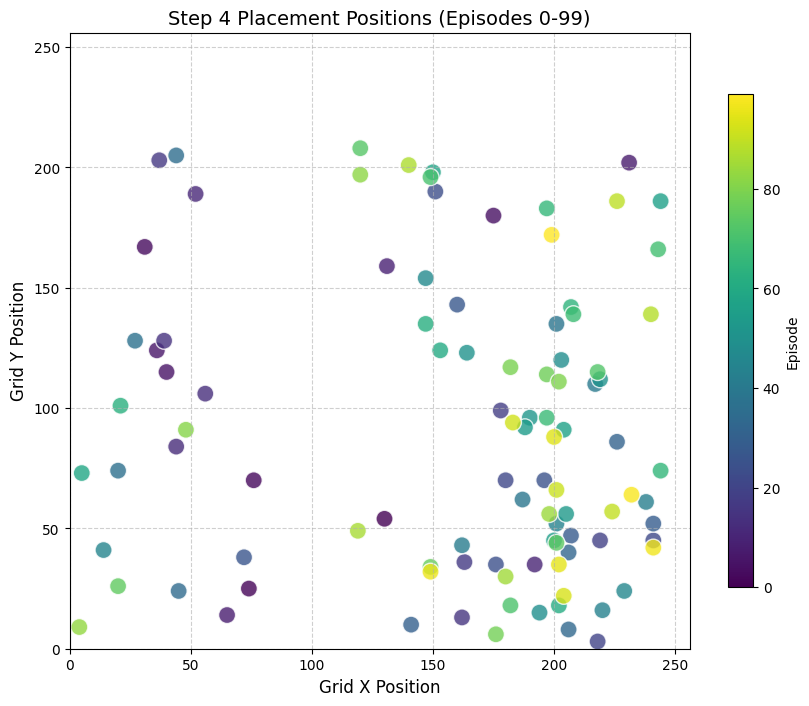

In [47]:
plt.figure(figsize=(10, 8))

# 绘制散点图，颜色根据episode渐变（假设episode从1开始）
colors = plt.cm.viridis(np.array(episodes) / max(episodes))
plt.scatter(xs, ys, c=colors, s=150, alpha=0.8, edgecolors='white', linewidth=1)

# 添加颜色条时指定ax=plt.gca()
plt.colorbar(sm, label="Episode", shrink=0.8, ax=plt.gca())  # 添加ax参数

plt.title(f"Step 4 Placement Positions (Episodes 0-{max(episodes)})", fontsize=14)
plt.xlabel("Grid X Position", fontsize=12)
plt.ylabel("Grid Y Position", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 256)
plt.ylim(0, 256)

plt.show()

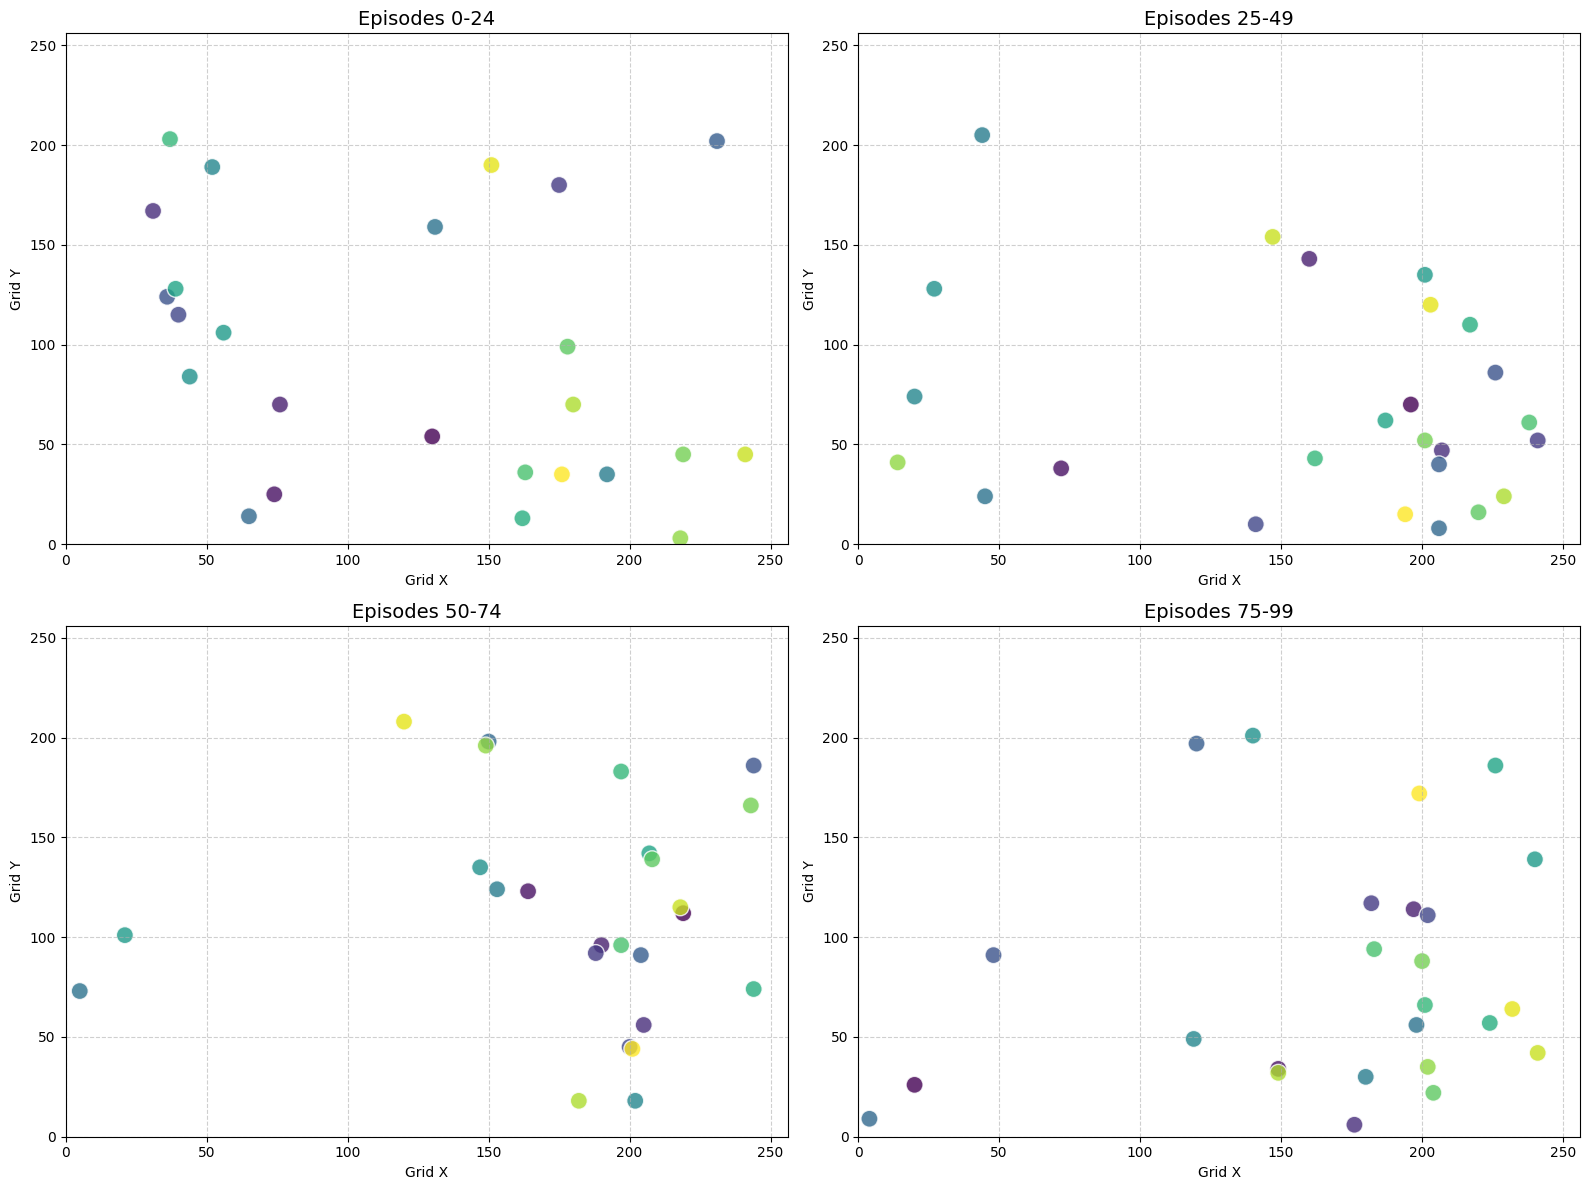

In [48]:
plt.figure(figsize=(16, 12))

# 将episode分成4个阶段
num_stages = 4
stage_size = len(episodes) // num_stages

for i in range(num_stages):
    start = i * stage_size
    end = (i + 1) * stage_size if i < num_stages - 1 else len(episodes)
    
    plt.subplot(2, 2, i + 1)
    plt.scatter(
        xs[start:end], ys[start:end],
        c=episodes[start:end],
        cmap='viridis',
        s=150,
        alpha=0.8,
        edgecolors='white',
        linewidth=1
    )
    
    plt.title(f'Episodes {episodes[start]}-{episodes[end-1]}', fontsize=14)
    plt.xlabel('Grid X')
    plt.ylabel('Grid Y')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim(0, 256)
    plt.ylim(0, 256)

plt.tight_layout()
plt.show()

/tmp/ipykernel_3776879/4142440598.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




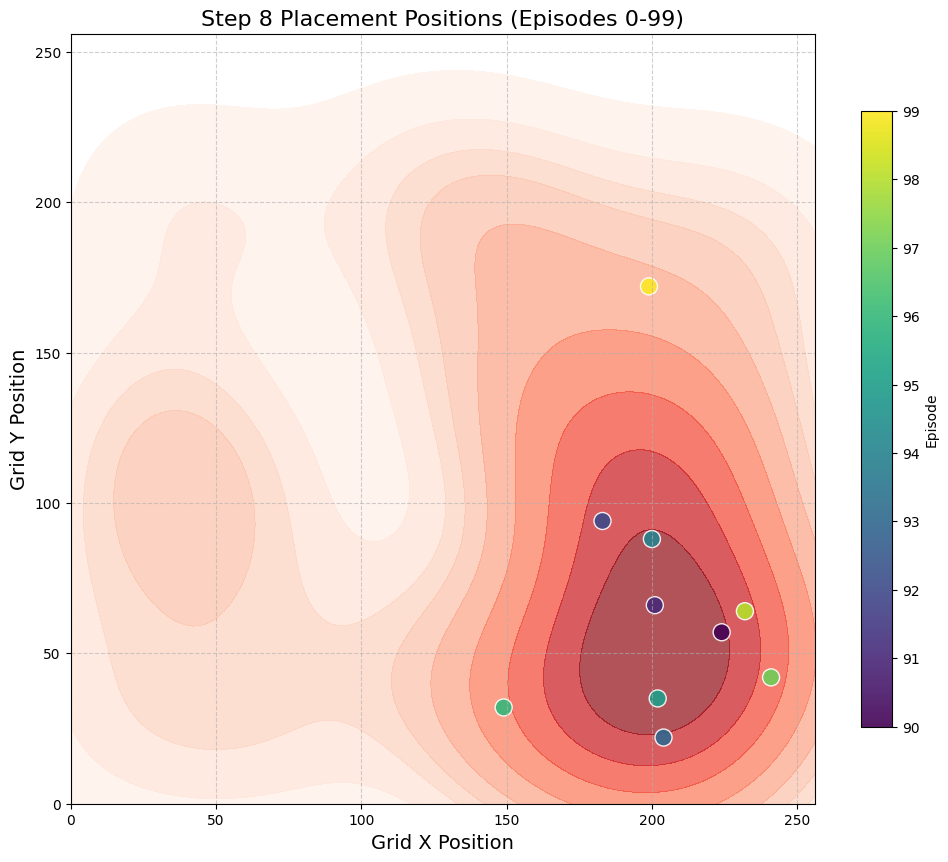

In [52]:
import seaborn as sns

plt.figure(figsize=(12, 10))

# 绘制热力图（使用高斯核密度估计）
sns.kdeplot(
    x=xs, y=ys, 
    cmap="Reds", 
    shade=True, 
    alpha=0.7, 
    levels=10, 
    thresh=0.05
)

# 叠加散点图（仅显示最近的XX%数据，避免遮挡热力图）
recent_ratio = 0.1
recent_idx = int(len(episodes) * (1 - recent_ratio))
plt.scatter(
    xs[recent_idx:], ys[recent_idx:],
    c=episodes[recent_idx:],
    cmap='viridis',
    s=150,
    alpha=0.9,
    edgecolors='white',
    linewidth=1
)

plt.colorbar(label="Episode", shrink=0.8)
plt.title(f"Step 8 Placement Positions (Episodes {min(episodes)}-{max(episodes)})", fontsize=16)
plt.xlabel("Grid X Position", fontsize=14)
plt.ylabel("Grid Y Position", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(0, 256)
plt.ylim(0, 256)

plt.show()